In [3]:
#importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt

In [4]:
#loading the pentacene lab data and simulated spectrum

data5000 = np.loadtxt('Pentacene_air_snr5000.txt').transpose()
data2000 = np.loadtxt('Pentacene_air_snr2000.txt').transpose()
data1000 = np.loadtxt('Pentacene_air_snr1000.txt').transpose()
data500 = np.loadtxt('Pentacene_air_snr500.txt').transpose()
data100 = np.loadtxt('Pentacene_air_snr100.txt').transpose()

In [5]:
#checking the size of data

print(data5000.shape)

(2, 7759)


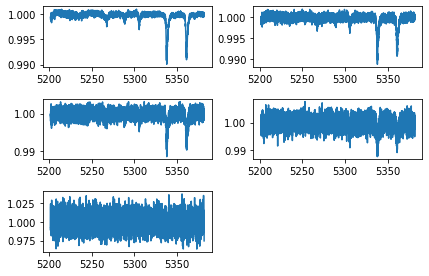

In [6]:
#plotting the 5 lab/simulated spectra

%matplotlib inline

fig1, axs = plt.subplots(3,2)

plt.tight_layout()

axs[0, 0].plot(data5000[0], data5000[1], label = 'SNR = 5000')
axs[0, 1].plot(data2000[0], data2000[1], label = 'SNR = 2000')
axs[1, 0].plot(data1000[0], data1000[1], label = 'SNR = 1000')
axs[1, 1].plot(data500[0], data500[1], label = 'SNR = 500')
axs[2, 0].plot(data100[0], data100[1], label = 'SNR = 100')
fig1.delaxes(axs[2,1])
plt.show()

<IPython.core.display.Javascript object>


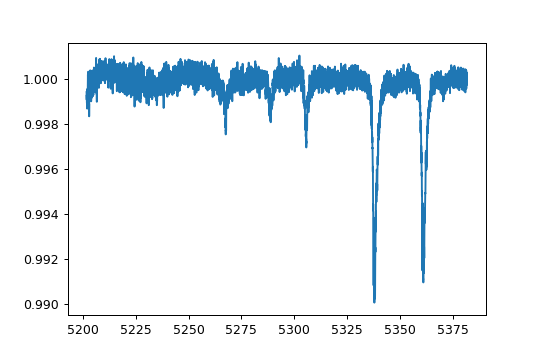

In [7]:
#plotting just the lab data graph

%matplotlib notebook

plt.plot(data5000[0], data5000[1], label = 'SNR = 5000')
plt.show()

In [8]:
#putting the peak values and ranges
#I took minimas of peak as central value here

%matplotlib inline

peakmins = np.zeros(5)
peakmaxs = np.zeros(5)
peakcens = np.zeros(5)

peakmins[0] = 5264.222303
peakmaxs[0] = 5270.360895
peakcens[0] = 5267.600206

peakmins[1] = 5287.032308
peakmaxs[1] = 5290.810678
peakcens[1] = 5288.886049

peakmins[2] = 5303.716283
peakmaxs[2] = 5308.335695
peakcens[2] = 5305.721707

peakmins[3] = 5335.136806
peakmaxs[3] = 5342.695359
peakcens[3] = 5337.921532

peakmins[4] = 5358.495471
peakmaxs[4] = 5365.142247
peakcens[4] = 5361.090278

#peak

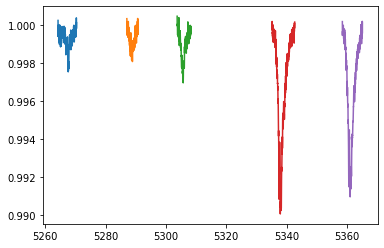

In [9]:
#extracting wavelengths and intensities within ranges from lab data

peak1data = data5000[:, np.logical_and(data5000[0]>=peakmins[0], data5000[0]<=peakmaxs[0])]
peak2data = data5000[:, np.logical_and(data5000[0]>=peakmins[1], data5000[0]<=peakmaxs[1])]
peak3data = data5000[:, np.logical_and(data5000[0]>=peakmins[2], data5000[0]<=peakmaxs[2])]
peak4data = data5000[:, np.logical_and(data5000[0]>=peakmins[3], data5000[0]<=peakmaxs[3])]
peak5data = data5000[:, np.logical_and(data5000[0]>=peakmins[4], data5000[0]<=peakmaxs[4])]

#print(peak1data)
plt.plot(peak1data[0], peak1data[1], label = 'peak1')
plt.plot(peak2data[0], peak2data[1], label = 'peak2')
plt.plot(peak3data[0], peak3data[1], label = 'peak3')
plt.plot(peak4data[0], peak4data[1], label = 'peak4')
plt.plot(peak5data[0], peak5data[1], label = 'peak5')

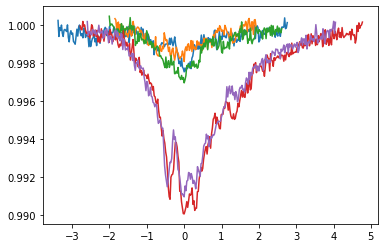

In [8]:
#shifting the above peaks by central value

p1dshifted = np.zeros(peak1data.shape)
p1dshifted[0] = peak1data[0] - peakcens[0]
p1dshifted[1] = peak1data[1]
plt.plot(p1dshifted[0], p1dshifted[1], label='shifted peak 1')

p2dshifted = np.zeros(peak2data.shape)
p2dshifted[0] = peak2data[0] - peakcens[1]
p2dshifted[1] = peak2data[1]
plt.plot(p2dshifted[0], p2dshifted[1], label='shifted peak 2')

p3dshifted = np.zeros(peak3data.shape)
p3dshifted[0] = peak3data[0] - peakcens[2]
p3dshifted[1] = peak3data[1]
plt.plot(p3dshifted[0], p3dshifted[1], label='shifted peak 3')

p4dshifted = np.zeros(peak4data.shape)
p4dshifted[0] = peak4data[0] - peakcens[3]
p4dshifted[1] = peak4data[1]
plt.plot(p4dshifted[0], p4dshifted[1], label='shifted peak 4')

p5dshifted = np.zeros(peak5data.shape)
p5dshifted[0] = peak5data[0] - peakcens[4]
p5dshifted[1] = peak5data[1]
plt.plot(p5dshifted[0], p5dshifted[1], label='shifted peak 5')

In [9]:
#find our range of working and number of points in range

minWave = (peakmins-peakcens).max()
maxWave = (peakmaxs-peakcens).min()
#print(minWave)
#print(maxWave)
#print(p1dshifted.shape[1])
nosPoints = max(p1dshifted.shape[1], p2dshifted.shape[1], p3dshifted.shape[1], p4dshifted.shape[1], p5dshifted.shape[1])
#print(nosPoints)

wavelengths = np.linspace(minWave, maxWave, num=nosPoints)
#print(wavelengths)

In [16]:
#don't use these!!!!

#limiting data to above range

p1dlim = p1dshifted[:, np.logical_and(p1dshifted[0]>=minWave, p1dshifted[0]<=maxWave)]
p2dlim = p2dshifted[:, np.logical_and(p2dshifted[0]>=minWave, p2dshifted[0]<=maxWave)]
p3dlim = p3dshifted[:, np.logical_and(p3dshifted[0]>=minWave, p3dshifted[0]<=maxWave)]
p4dlim = p4dshifted[:, np.logical_and(p4dshifted[0]>=minWave, p4dshifted[0]<=maxWave)]
p5dlim = p5dshifted[:, np.logical_and(p5dshifted[0]>=minWave, p5dshifted[0]<=maxWave)]
#print(p1dlim)

In [17]:
#interpolation

from scipy.interpolate import interp1d

f1 = interp1d(p1dshifted[0],p1dshifted[1])
f2 = interp1d(p2dshifted[0],p2dshifted[1])
f3 = interp1d(p3dshifted[0],p3dshifted[1])
f4 = interp1d(p4dshifted[0],p4dshifted[1])
f5 = interp1d(p5dshifted[0],p5dshifted[1])

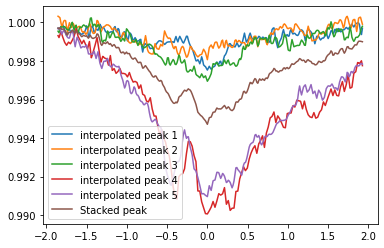

In [21]:
#plotting interpolated peaks and stacked peak

p1dfin = np.zeros((2, nosPoints))
p1dfin[0] = wavelengths
p1dfin[1] = f1(wavelengths)
plt.plot(p1dfin[0], p1dfin[1], label = 'interpolated peak 1')

p2dfin = np.zeros((2, nosPoints))
p2dfin[0] = wavelengths
p2dfin[1] = f2(wavelengths)
plt.plot(p2dfin[0], p2dfin[1], label = 'interpolated peak 2')

p3dfin = np.zeros((2, nosPoints))
p3dfin[0] = wavelengths
p3dfin[1] = f3(wavelengths)
plt.plot(p3dfin[0], p3dfin[1], label = 'interpolated peak 3')

p4dfin = np.zeros((2, nosPoints))
p4dfin[0] = wavelengths
p4dfin[1] = f4(wavelengths)
plt.plot(p4dfin[0], p4dfin[1], label = 'interpolated peak 4')

p5dfin = np.zeros((2, nosPoints))
p5dfin[0] = wavelengths
p5dfin[1] = f5(wavelengths)
plt.plot(p5dfin[0], p5dfin[1], label = 'interpolated peak 5')

finalData = np.zeros((2, nosPoints))
finalData[0] = wavelengths
finalData[1] = (p1dfin[1]+p2dfin[1]+p3dfin[1]+p4dfin[1]+p5dfin[1])/5.0
plt.plot(finalData[0], finalData[1], label = 'Stacked peak')

plt.legend()

In [112]:
#stacking function which takes snr number and outputs all required plots

def stacker(snr):
    snr = str(snr)
    
    #extracting data
    
    varName = 'data' + snr
    fdata = globals()[varName]
    
    
    #plotting spectrum
    
    ffig, faxs = plt.subplots(3, 2, figsize=(12,15))
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    faxs[0, 0].plot(fdata[0], fdata[1], label = 'Spectrum')
    
    faxs[0, 0].set_title('Full spectrum')
    faxs[0, 0].set(xlabel = 'Wavelength in Å', ylabel = 'Relative intensity')
    faxs[0, 0].legend()
    
    
    #extracting wavelengths and intensities within ranges from lab data and plotting them

    fpeak1data = fdata[:, np.logical_and(fdata[0]>=peakmins[0], fdata[0]<=peakmaxs[0])]
    fpeak2data = fdata[:, np.logical_and(fdata[0]>=peakmins[1], fdata[0]<=peakmaxs[1])]
    fpeak3data = fdata[:, np.logical_and(fdata[0]>=peakmins[2], fdata[0]<=peakmaxs[2])]
    fpeak4data = fdata[:, np.logical_and(fdata[0]>=peakmins[3], fdata[0]<=peakmaxs[3])]
    fpeak5data = fdata[:, np.logical_and(fdata[0]>=peakmins[4], fdata[0]<=peakmaxs[4])]
    
    faxs[0, 1].plot(fpeak1data[0], fpeak1data[1], label = 'Just peak 1')
    faxs[0, 1].plot(fpeak2data[0], fpeak2data[1], label = 'Just peak 2')
    faxs[0, 1].plot(fpeak3data[0], fpeak3data[1], label = 'Just peak 3')
    faxs[0, 1].plot(fpeak4data[0], fpeak4data[1], label = 'Just peak 4')
    faxs[0, 1].plot(fpeak5data[0], fpeak5data[1], label = 'Just peak 5')
    
    faxs[0, 1].set_title('Spectrum with just peaks')
    faxs[0, 1].set(xlabel = 'Wavelength in Å', ylabel = 'Relative intensity')
    faxs[0, 1].legend()
    
    
    #shifting the above peaks by central value

    fp1dshifted = np.zeros(fpeak1data.shape)
    fp1dshifted[0] = fpeak1data[0] - peakcens[0]
    fp1dshifted[1] = fpeak1data[1]
    faxs[1, 0].plot(fp1dshifted[0], fp1dshifted[1], label='Shifted peak 1')

    fp2dshifted = np.zeros(fpeak2data.shape)
    fp2dshifted[0] = fpeak2data[0] - peakcens[1]
    fp2dshifted[1] = fpeak2data[1]
    faxs[1, 0].plot(fp2dshifted[0], fp2dshifted[1], label='Shifted peak 2')

    fp3dshifted = np.zeros(fpeak3data.shape)
    fp3dshifted[0] = fpeak3data[0] - peakcens[2]
    fp3dshifted[1] = fpeak3data[1]
    faxs[1, 0].plot(fp3dshifted[0], fp3dshifted[1], label='Shifted peak 3')

    fp4dshifted = np.zeros(fpeak4data.shape)
    fp4dshifted[0] = fpeak4data[0] - peakcens[3]
    fp4dshifted[1] = fpeak4data[1]
    faxs[1, 0].plot(fp4dshifted[0], fp4dshifted[1], label='Shifted peak 4')

    fp5dshifted = np.zeros(fpeak5data.shape)
    fp5dshifted[0] = fpeak5data[0] - peakcens[4]
    fp5dshifted[1] = fpeak5data[1]
    faxs[1, 0].plot(fp5dshifted[0], fp5dshifted[1], label='Shifted peak 5')
    
    faxs[1, 0].set_title('Spectrum with peaks shifted')
    faxs[1, 0].set(xlabel = 'Relative Wavelength (shifted by peak) in Å', ylabel = 'Relative intensity')
    faxs[1, 0].legend()
    
    
    #calculating no of points and corresponding equally distributed wavelengths
    
    fnosPoints = max(fp1dshifted.shape[1], fp2dshifted.shape[1], fp3dshifted.shape[1], fp4dshifted.shape[1], fp5dshifted.shape[1])
    fwavelengths = np.linspace(minWave, maxWave, num=fnosPoints)
    
    
    #interpolation
    
    ff1 = interp1d(fp1dshifted[0],fp1dshifted[1])
    ff2 = interp1d(fp2dshifted[0],fp2dshifted[1])
    ff3 = interp1d(fp3dshifted[0],fp3dshifted[1])
    ff4 = interp1d(fp4dshifted[0],fp4dshifted[1])
    ff5 = interp1d(fp5dshifted[0],fp5dshifted[1])
    
    
    #plotting interpolated peaks and stacked peak

    fp1dfin = np.zeros((2, fnosPoints))
    fp1dfin[0] = fwavelengths
    fp1dfin[1] = ff1(fwavelengths)
    faxs[1, 1].plot(fp1dfin[0], fp1dfin[1], label = 'Interpolated peak 1')

    fp2dfin = np.zeros((2, fnosPoints))
    fp2dfin[0] = fwavelengths
    fp2dfin[1] = ff2(fwavelengths)
    faxs[1, 1].plot(fp2dfin[0], fp2dfin[1], label = 'Interpolated peak 2')

    fp3dfin = np.zeros((2, fnosPoints))
    fp3dfin[0] = fwavelengths
    fp3dfin[1] = ff3(fwavelengths)
    faxs[1, 1].plot(fp3dfin[0], fp3dfin[1], label = 'Interpolated peak 3')

    fp4dfin = np.zeros((2, fnosPoints))
    fp4dfin[0] = fwavelengths
    fp4dfin[1] = ff4(fwavelengths)
    faxs[1, 1].plot(fp4dfin[0], fp4dfin[1], label = 'interpolated peak 4')

    fp5dfin = np.zeros((2, fnosPoints))
    fp5dfin[0] = fwavelengths
    fp5dfin[1] = ff5(fwavelengths)
    faxs[1, 1].plot(fp5dfin[0], fp5dfin[1], label = 'interpolated peak 5')

    ffinalData = np.zeros((2, fnosPoints))
    ffinalData[0] = fwavelengths
    ffinalData[1] = (fp1dfin[1]+fp2dfin[1]+fp3dfin[1]+fp4dfin[1]+fp5dfin[1])/5.0
    faxs[1, 1].plot(ffinalData[0], ffinalData[1], label = 'Stacked peak')
    
    faxs[1, 1].set_title('Spectrum with peaks interpolated in calculated range and stacked peak')
    faxs[1, 1].set(xlabel = 'Relative Wavelength (shifted by peak) in Å', ylabel = 'Relative intensity')
    faxs[1, 1].legend()
    
    faxs[2, 0].plot(ffinalData[0], ffinalData[1], label = 'Just stacked peak')
    
    faxs[2, 0].set_title('Just stacked peak')
    faxs[2, 0].set(xlabel = 'Relative Wavelength (shifted by peak) in Å', ylabel = 'Relative intensity')
    faxs[2, 0].legend()
    
    ffig.delaxes(faxs[2, 1])
    
    plt.subplots_adjust(hspace=0.3, wspace=0.2)
    
    fullTitle = 'Plots for snr ' + snr
    plt.suptitle(fullTitle, size = 18)

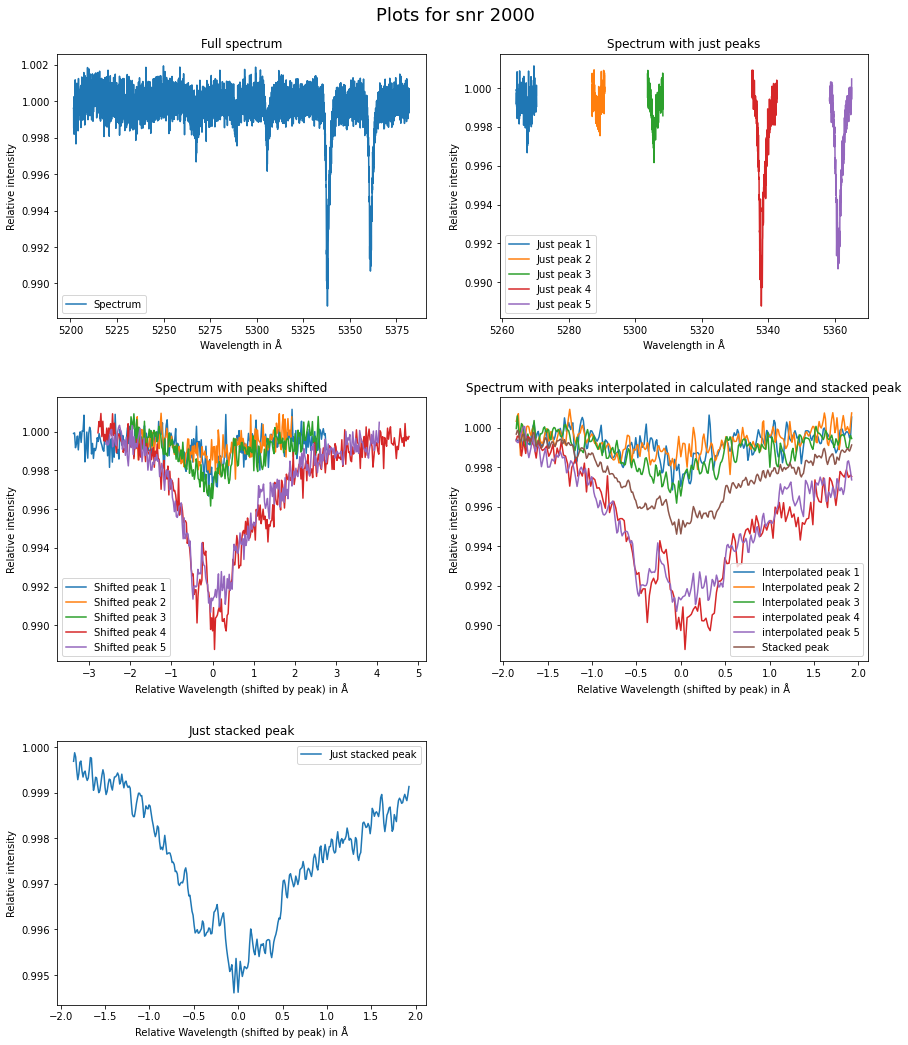

In [113]:
stacker(2000)

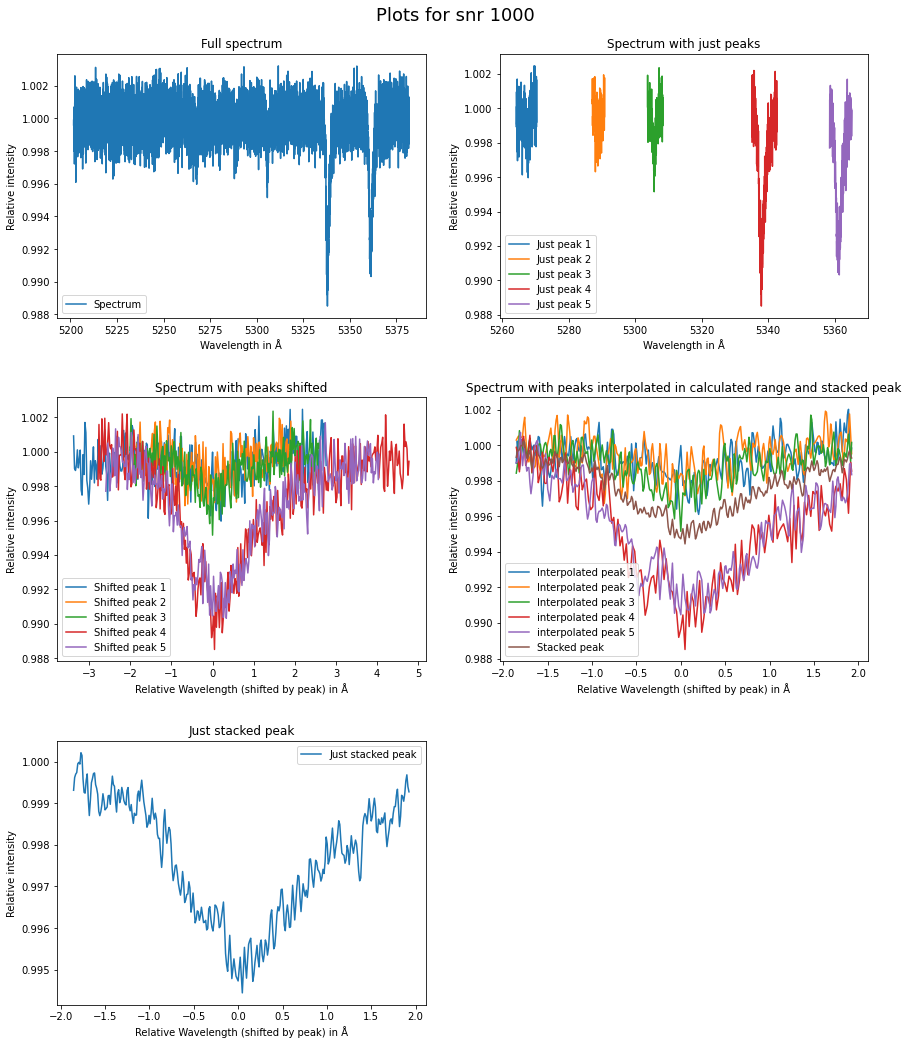

In [114]:
stacker(1000)

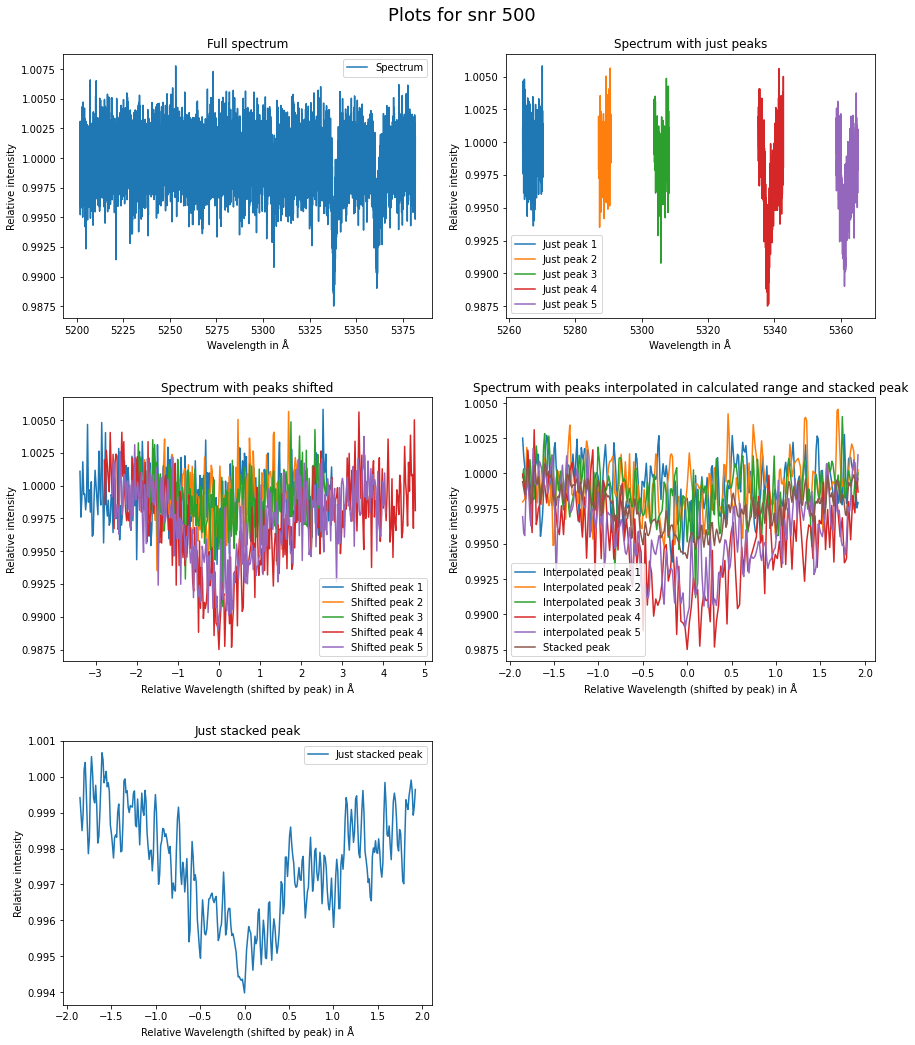

In [115]:
stacker(500)

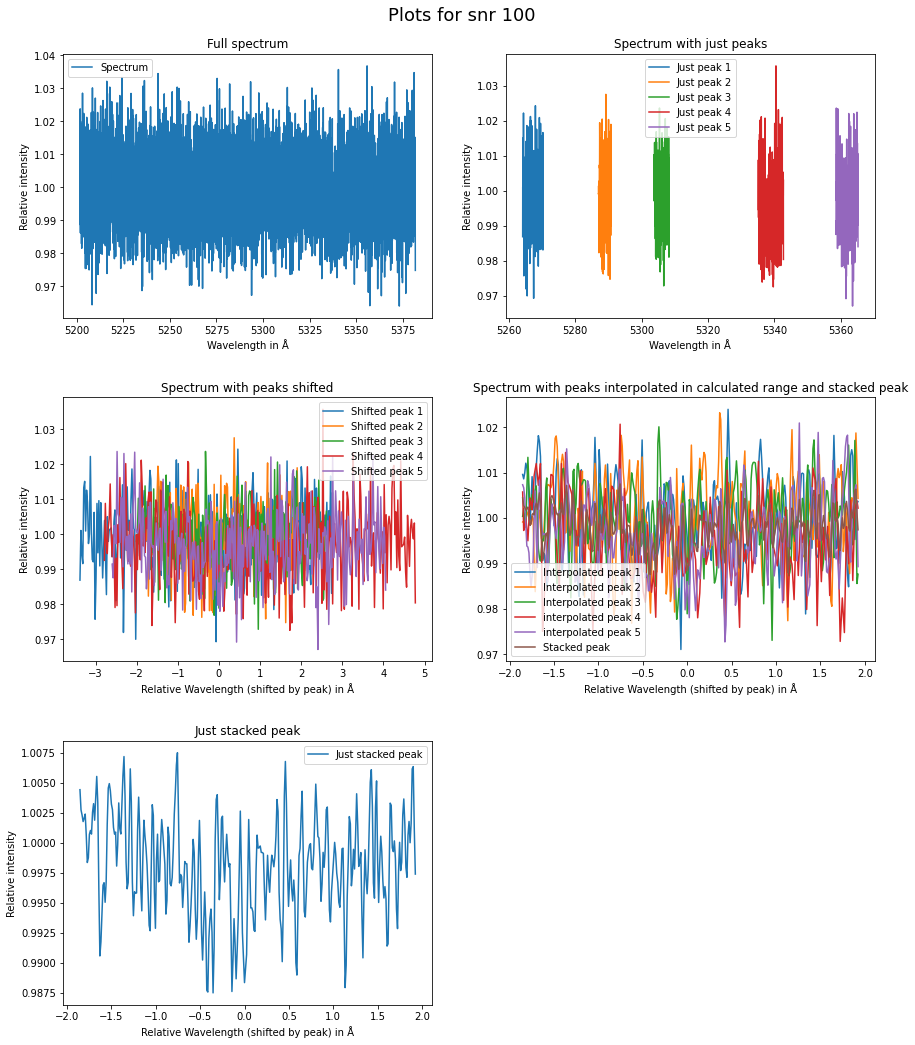

In [116]:
stacker(100)

[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 321
    # variables        = 3
    chi-square         = 1.8458e-04
    reduced chi-square = 5.8043e-07
    Akaike info crit   = -4606.41481
    Bayesian info crit = -4595.10049
[[Variables]]
    amplitude:  0.02350029 +/- 3.3870e-04 (1.44%) (init = 0.04516801)
    center:     5338.13808 +/- 0.01461296 (0.00%) (init = 5338.136)
    sigma:      0.57192496 +/- 0.01074364 (1.88%) (init = 0.6446905)
    gamma:      0.57192496 +/- 0.01074364 (1.88%) == 'sigma'
    fwhm:       2.05966799 +/- 0.02352774 (1.14%) == '1.0692*gamma+sqrt(0.8664*gamma**2+5.545083*sigma**2)'
    height:     0.00857583 +/- 9.3278e-05 (1.09%) == '(amplitude/(max(1e-15, sigma*sqrt(2*pi))))*wofz((1j*gamma)/(max(1e-15, sigma*sqrt(2)))).real'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.657


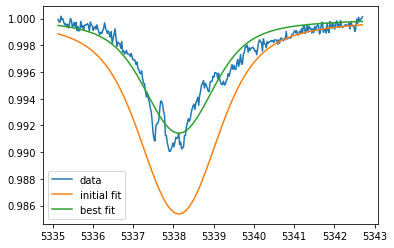

In [10]:
from lmfit.models import VoigtModel

#print(peak4data)
mod = VoigtModel()
params = mod.guess((1-peak4data[1]), x=peak4data[0])
result = mod.fit((1-peak4data[1]), params, x=peak4data[0])
print(result.fit_report())
plt.plot(peak4data[0], peak4data[1], label='data')
plt.plot(peak4data[0], (1-result.init_fit), label='initial fit')
plt.plot(peak4data[0], (1-result.best_fit), label='best fit')
plt.legend()

In [21]:
print(np.min(data5000[0]))
print(data5000[1].size)

5201.752074
7759


In [29]:
def index_of(arrval, value):
    """Return index of array *at or below* value."""
    if value < min(arrval):
        return 0
    #print(max(np.where(arrval <= value)[0]))
    return max(np.where(arrval <= value)[0])

In [30]:
ix1 = index_of(data5000[0], peakcens[0])
ix2 = index_of(data5000[0], peakcens[1])
ix3 = index_of(data5000[0], peakcens[2])
ix4 = index_of(data5000[0], peakcens[3])
ix5 = index_of(data5000[0], peakcens[4])

In [39]:
ixx1 = data5000[1].size//5
ixx2 = 2*data5000[1].size//5
ixx3 = 3*data5000[1].size//5
ixx4 = 4*data5000[1].size//5
ixx5 = data5000[1].size

In [40]:
vm1 = VoigtModel(prefix = 'V1_')
pars = vm1.guess((1-data5000[1, 0:ixx1]),x=data5000[0, 0:ixx1])
vm2 = VoigtModel(prefix = 'V2_')
pars.update(vm2.guess((1-data5000[1, ixx1:ixx2]),x=data5000[0, ixx1:ixx2]))
vm3 = VoigtModel(prefix = 'V3_')
pars.update(vm3.guess((1-data5000[1, ixx2:ixx3]),x=data5000[0, ixx2:ixx3]))
vm4 = VoigtModel(prefix = 'V4_')
pars.update(vm4.guess((1-data5000[1, ixx3:ixx4]),x=data5000[0, ixx3:ixx4]))
vm5 = VoigtModel(prefix = 'V5_')
pars.update(vm5.guess((1-data5000[1, ixx4:ixx5]),x=data5000[0, ixx4:ixx5]))

#vm1 = VoigtModel(prefix = 'V1_')
#pars = vm1.guess((1-data5000[1, ix1//2:(ix1+ix2)//2]),x=data5000[0, ix1//2:(ix1+ix2)//2])
#vm2 = VoigtModel(prefix = 'V2_')
#pars.update(vm2.guess((1-data5000[1, (ix1+ix2)//2:(ix2+ix3)//2]),x=data5000[0, (ix1+ix2)//2:(ix2+ix3)//2]))
#vm3 = VoigtModel(prefix = 'V3_')
#pars.update(vm3.guess((1-data5000[1, (ix2+ix3)//2:(ix3+ix4)//2]),x=data5000[0, (ix2+ix3)//2:(ix3+ix4)//2]))
#vm4 = VoigtModel(prefix = 'V4_')
#pars.update(vm4.guess((1-data5000[1, (ix3+ix4)//2:(ix4+ix5)//2]),x=data5000[0, (ix3+ix4)//2:(ix4+ix5)//2]))
#vm5 = VoigtModel(prefix = 'V5_')
#pars.update(vm5.guess((1-data5000[1, (ix4+ix5)//2:(ix5+data5000[1].size)//2]),x=data5000[0, (ix4+ix5)//2:(ix5+data5000[1].size)//2]))

#vm1 = VoigtModel(prefix = 'V1_')
#pars = vm1.guess((1-data5000[1]),x=data5000[0])
#vm2 = VoigtModel(prefix = 'V2_')
#pars.update(vm2.guess((1-data5000[1]),x=data5000[0]))
#vm3 = VoigtModel(prefix = 'V3_')
#pars.update(vm3.guess((1-data5000[1]),x=data5000[0]))
#vm4 = VoigtModel(prefix = 'V4_')
#pars.update(vm4.guess((1-data5000[1]),x=data5000[0]))
#vm5 = VoigtModel(prefix = 'V5_')
#pars.update(vm5.guess((1-data5000[1]),x=data5000[0]))


#pars['V1_center'].set(min=np.min(data5000[0]), max=np.max(data5000[0]))
#pars['V2_center'].set(min=np.min(data5000[0]), max=np.max(data5000[0]))
#pars['V3_center'].set(min=np.min(data5000[0]), max=np.max(data5000[0]))
#pars['V4_center'].set(min=np.min(data5000[0]), max=np.max(data5000[0]))
#pars['V5_center'].set(min=np.min(data5000[0]), max=np.max(data5000[0]))

#pars['V1_center'].set(value=5267.0, min=np.min(data5000[0]), max=np.max(data5000[0]))
#pars['V2_center'].set(value=5289.0, min=np.min(data5000[0]), max=np.max(data5000[0]))
#pars['V3_center'].set(value=5306.0, min=np.min(data5000[0]), max=np.max(data5000[0]))
#pars['V4_center'].set(value=5337.0, min=np.min(data5000[0]), max=np.max(data5000[0]))
#pars['V5_center'].set(value=5361.0, min=np.min(data5000[0]), max=np.max(data5000[0]))

#print(pars)

name,value,initial value,min,max,vary,expression
V1_amplitude,0.20997829,None,-inf,inf,True,
V1_center,5222.12868,None,-inf,inf,True,
V1_sigma,11.3638808,None,0.00000000,inf,True,
V1_gamma,11.3638808,None,-inf,inf,False,V1_sigma
V1_fwhm,40.9246374,None,-inf,inf,False,1.0692*V1_gamma+sqrt(0.8664*V1_gamma**2+5.545083*V1_sigma**2)
V1_height,0.00385647,None,-inf,inf,False,"(V1_amplitude/(max(1e-15, V1_sigma*sqrt(2*pi))))*wofz((1j*V1_gamma)/(max(1e-15, V1_sigma*sqrt(2)))).real"
V2_amplitude,0.24519639,None,-inf,inf,True,
V2_center,5266.20137,None,-inf,inf,True,
V2_sigma,10.5660071,None,0.00000000,inf,True,
V2_gamma,10.5660071,None,-inf,inf,False,V2_sigma


In [41]:
gmodel = vm1 + vm2 + vm3 + vm4 + vm5
res = gmodel.fit((1-data5000[1]), pars, x=data5000[0])


[[Model]]
    ((((Model(voigt, prefix='V1_') + Model(voigt, prefix='V2_')) + Model(voigt, prefix='V3_')) + Model(voigt, prefix='V4_')) + Model(voigt, prefix='V5_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 443
    # data points      = 7759
    # variables        = 15
    chi-square         = 9.9980e-04
    reduced chi-square = 1.2911e-07
    Akaike info crit   = -123063.135
    Bayesian info crit = -122958.786
[[Variables]]
    V1_amplitude:  0.00452117 +/- 1.6815e-04 (3.72%) (init = 0.2099783)
    V1_center:     5267.57029 +/- 0.04404333 (0.00%) (init = 5222.129)
    V1_sigma:      0.66325845 +/- 0.03209364 (4.84%) (init = 11.36388)
    V1_gamma:      0.66325845 +/- 0.03209364 (4.84%) == 'V1_sigma'
    V1_fwhm:       2.38858646 +/- 0.07028259 (2.94%) == '1.0692*V1_gamma+sqrt(0.8664*V1_gamma**2+5.545083*V1_sigma**2)'
    V1_height:     0.00142269 +/- 4.0210e-05 (2.83%) == '(V1_amplitude/(max(1e-15, V1_sigma*sqrt(2*pi))))*wofz((1j*V1_gamma)/(max(1e-15

<IPython.core.display.Javascript object>


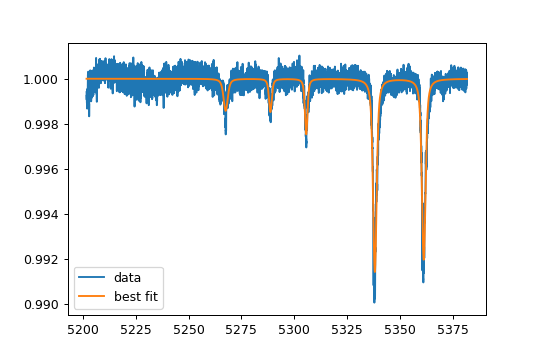

In [42]:
%matplotlib notebook

print(res.fit_report())
plt.plot(data5000[0], data5000[1], label='data')
#plt.plot(data5000[0], (1-res.init_fit), label='initial fit')
plt.plot(data5000[0], (1-res.best_fit), label='best fit')
plt.legend()

In [65]:
from scipy.signal import find_peaks

In [213]:
minima = find_peaks(1-data5000[1], height = 0.001932, distance = 724)
#print(minima[0])
if 5267.600206 in data5000[0, minima[0]] and 5288.886049 in data5000[0, minima[0]] and 5305.721707 in data5000[0, minima[0]] and 5337.921532 in data5000[0, minima[0]] and 5361.090278 in data5000[0, minima[0]]:
    if minima[0].size!=5:
        print('Peak kam kar be')
        print(minima[0].size)
        print(data5000[0, minima[0]])
    else:
        print('Waah')
        print(minima[0].size)
        print(data5000[0, minima[0]])
else:
    print('Tumse na ho paega')
    print(minima[0].size)
    print(data5000[0, minima[0]])

Waah
5
[5267.600206 5288.886049 5305.721707 5337.921532 5361.090278]
